
Using Titanic data set from kaggle, I will be trying to predict a classification- survival or deceased.



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
titanic=pd.read_csv('/content/titanic_train.csv')


# Missing Data

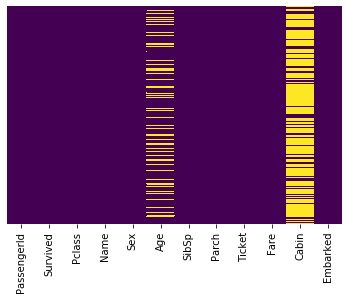

In [8]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age column has missing values we can do one of the following:


1. drop all the Nan rows.
2. fill all the missing values with the mean value of the age column.
3. be one step smarter and fill the missing values with the average  age of the class it belongs to.







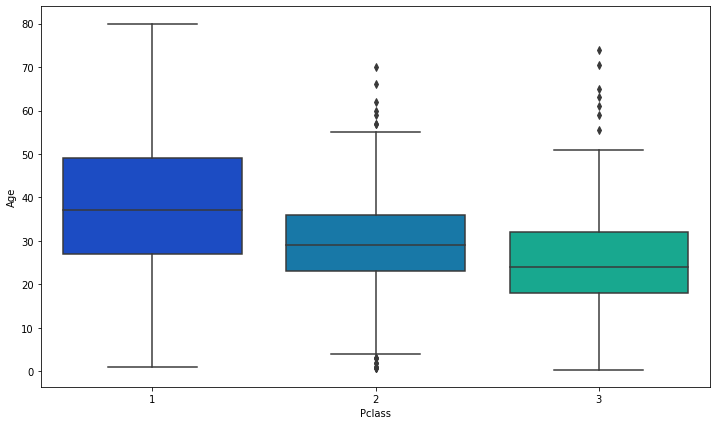

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

 Will use these average age values to impute based on Pclass for Age.
 class 1 average is almost=37
 class 2 average age =29
 class 3 average=22

In [0]:
def impute_age(col):
  age=col[0]
  pclass=col[1]
  if pd.isnull(age):
     if pclass==1:
        return 37
     elif pclass==2:
          return 29
     elif pclass==3:
          return 22
  else:
    return age             

In [0]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

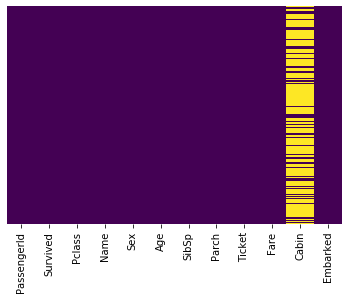

In [17]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
titanic.drop('Cabin',axis=1,inplace=True)

# **Converting Categorical Features**
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [0]:
dummy_sex=pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic=pd.concat([titanic,dummy_sex,embark],axis=1)




In [0]:

titanic.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [37]:
titanic.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

**Building a Logistic Regression model:**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                   titanic['Survived'], test_size=0.30
                                                    )

In [42]:
from sklearn.linear_model import LogisticRegression
logregg_ml=LogisticRegression()
logregg_ml.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predections=logregg_ml.predict(X_test)

**Evaluation**
We can check precision,recall,f1-score using classification report!

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predections))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       160
           1       0.89      0.77      0.83       108

    accuracy                           0.87       268
   macro avg       0.87      0.85      0.86       268
weighted avg       0.87      0.87      0.87       268

